<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/LAPLACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.6 Consultar y realizar los ejercicios del cuaderno Definicion transformada de la Laplace.


El objetivo principal de ese cuaderno es pasar de la definición integral:$$X(s) = \int_{-\infty}^{\infty} x(t) e^{-st} dt \quad \text{(Bilateral)}$$o$$X(s) = \int_{0}^{\infty} x(t) e^{-st} dt \quad \text{(Unilateral)}$$

A la resolución computacional.A continuación, realizo los ejercicios típicos propuestos en esta sección (Definición, ROC y Transformadas Básicas) y te proporciono el código completo explicado.

Ejercicios Resueltos: Definición de Laplace con SymPyLos ejercicios en este cuaderno generalmente piden calcular la transformada de señales fundamentales y determinar sus condiciones de convergencia.

Ejercicio 1: La Exponencial Decreciente (El "Hola Mundo" de Laplace)Señal: $x(t) = e^{-at} u(t)$Objetivo: Encontrar $X(s)$ y su Región de Convergencia (ROC).

Teoría: La integral es $\int_{0}^{\infty} e^{-at} e^{-st} dt = \int_{0}^{\infty} e^{-(s+a)t} dt$.

Resultado esperado: $\frac{1}{s+a}$ con $\text{Re}\{s\} > -a$.


Ejercicio 2: La Señal CosenoidalSeñal: $x(t) = \cos(\omega t) u(t)$

Objetivo: Demostrar cómo Laplace maneja funciones oscilatorias.

Resultado esperado:

$\frac{s}{s^2 + \omega^2}$.

Ejercicio 3: La Rampa AmortiguadaSeñal:

$x(t) = t e^{-at} u(t)$Objetivo: Verificar la propiedad de diferenciación en frecuencia (multiplicación por $t$).Resultado esperado: $\frac{1}{(s+a)^2}$.

🐍 Código Python para Realizar los EjerciciosEste código utiliza sympy.

laplace_transform, que devuelve una tupla (Transformada, Plano de Convergencia, Condiciones).

In [1]:
import sympy as sp

# 1. Definición de Variables Simbólicas
t, s = sp.symbols('t s')
a, w = sp.symbols('a w', real=True, positive=True) # Asumimos 'a' y 'w' positivos para facilitar convergencia

# Función auxiliar para imprimir resultados ordenados
def calcular_laplace(nombre_senyal, x_t):
    print(f"--- Análisis de {nombre_senyal} ---")
    print(f"x(t) = {x_t}")

    # SymPy calcula la unilateral por defecto (0 a inf)
    # retorna: (F, a, cond)
    # F: Transformada X(s)
    # a: Región de convergencia (Re{s} > a)
    # cond: Condiciones auxiliares
    X_s, roc, cond = sp.laplace_transform(x_t, t, s)

    print(f"X(s) = {X_s}")
    print(f"ROC: Re{{s}} > {roc}")
    print(f"Condiciones: {cond}")
    print("-" * 40)
    return X_s

# ==========================================
# EJECUCIÓN DE LOS EJERCICIOS
# ==========================================

print("EJERCICIOS DEL CUADERNO: 4_Transformada_Laplace/1_Definicion.ipynb\n")

# Ejercicio 1: Exponencial
# x(t) = e^(-at) * u(t)
# Nota: SymPy asume t >= 0 en laplace_transform, por lo que Heaviside es implícito,
# pero es buena práctica ponerlo explícito.
x1 = sp.exp(-a * t)
calcular_laplace("Exponencial Decreciente", x1)

# Ejercicio 2: Coseno
# x(t) = cos(wt)
x2 = sp.cos(w * t)
calcular_laplace("Coseno", x2)

# Ejercicio 3: Rampa (t)
# x(t) = t
x3 = t
calcular_laplace("Rampa Unitaria", x3)

# Ejercicio 4: Rampa Amortiguada
# x(t) = t * e^(-at)
x4 = t * sp.exp(-a * t)
calcular_laplace("Rampa Amortiguada", x4)

# Ejercicio 5: Delta de Dirac
# x(t) = delta(t)
x5 = sp.DiracDelta(t)
calcular_laplace("Delta de Dirac", x5)

# --- VERIFICACIÓN DE TEOREMA DEL VALOR FINAL (Opcional pero útil) ---
# Teorema: lim(t->inf) x(t) = lim(s->0) s*X(s)
# Probemos con x(t) = 1 - e^(-t) (Carga de capacitor)
print("--- Verificación Teorema Valor Final ---")
x_test = 1 - sp.exp(-t)
X_test, _, _ = sp.laplace_transform(x_test, t, s)
valor_final_t = sp.limit(x_test, t, sp.oo)
valor_final_s = sp.limit(s * X_test, s, 0)
print(f"x(t) = {x_test}")
print(f"Límite t->inf x(t): {valor_final_t}")
print(f"Límite s->0 s*X(s): {valor_final_s}")
if valor_final_t == valor_final_s:
    print("✅ El teorema se cumple.")

EJERCICIOS DEL CUADERNO: 4_Transformada_Laplace/1_Definicion.ipynb

--- Análisis de Exponencial Decreciente ---
x(t) = exp(-a*t)
X(s) = 1/(a + s)
ROC: Re{s} > -a
Condiciones: True
----------------------------------------
--- Análisis de Coseno ---
x(t) = cos(t*w)
X(s) = s/(s**2 + w**2)
ROC: Re{s} > 0
Condiciones: True
----------------------------------------
--- Análisis de Rampa Unitaria ---
x(t) = t
X(s) = s**(-2)
ROC: Re{s} > 0
Condiciones: True
----------------------------------------
--- Análisis de Rampa Amortiguada ---
x(t) = t*exp(-a*t)
X(s) = (a + s)**(-2)
ROC: Re{s} > -a
Condiciones: True
----------------------------------------
--- Análisis de Delta de Dirac ---
x(t) = DiracDelta(t)
X(s) = 1
ROC: Re{s} > -oo
Condiciones: True
----------------------------------------
--- Verificación Teorema Valor Final ---
x(t) = 1 - exp(-t)
Límite t->inf x(t): 1
Límite s->0 s*X(s): 1
✅ El teorema se cumple.


#2.7 Consultar y realizar los ejercicios del cuaderno Propiedades basicas transformada de la Laplace

Análisis Teórico: Propiedades BásicasEl cuaderno busca demostrar computacionalmente las siguientes identidades:

Linealidad:

 La transformada de una suma ponderada es la suma ponderada de las transformadas.$$L\{a x_1(t) + b x_2(t)\} = a X_1(s) + b X_2(s)$$Desplazamiento en Frecuencia (Modulación): Multiplicar por una exponencial en el tiempo desplaza la variable $s$.$$L\{e^{a t} x(t)\} = X(s - a)$$Desplazamiento en el Tiempo: Retrasar una señal en el tiempo multiplica por una exponencial en $s$.$$L\{x(t - t_0)u(t - t_0)\} = e^{-s t_0} X(s)$$Diferenciación en el Dominio $s$ (Multiplicación por $t$):$$L\{t x(t)\} = -\frac{d}{ds} X(s)$$Integración en el Tiempo:$$L\left\{\int_{0}^{t} x(\tau) d\tau\right\} = \frac{X(s)}{s}$$🐍


 Código Python: Resolución de Ejercicios de PropiedadesEste código utiliza SymPy para verificar estas propiedades. Compara el cálculo directo de la transformada de una señal compleja contra el resultado aplicando la propiedad a la señal base.

In [2]:
import sympy as sp

# 1. Configuración de variables simbólicas
t, s = sp.symbols('t s')
a, b, t0 = sp.symbols('a b t0', real=True, positive=True) # Constantes

# Función auxiliar para verificar igualdad
def verificar_propiedad(nombre, lhs, rhs):
    print(f"--- Verificando: {nombre} ---")
    print(f"Directo: {lhs}")
    print(f"Propiedad: {rhs}")
    # simplificamos la diferencia para ver si es cero
    diferencia = sp.simplify(lhs - rhs)
    if diferencia == 0:
        print("✅ Resultado: PROPIEDAD CUMPLIDA")
    else:
        print(f"❌ Resultado: DIFERENCIA DETECTADA ({diferencia})")
    print("-" * 40)

# =================================================================
# EJERCICIO 1: LINEALIDAD
# Señal: x(t) = 3*e^(-2t) + 4*cos(t)
# =================================================================
x1 = sp.exp(-2*t)
x2 = sp.cos(t)
c1, c2 = 3, 4

# Cálculo directo de la combinación
L_comb = sp.laplace_transform(c1*x1 + c2*x2, t, s, noconds=True)

# Cálculo por partes
X1 = sp.laplace_transform(x1, t, s, noconds=True)
X2 = sp.laplace_transform(x2, t, s, noconds=True)
L_propiedad = c1*X1 + c2*X2

verificar_propiedad("Linealidad", L_comb, L_propiedad)


# =================================================================
# EJERCICIO 2: DESPLAZAMIENTO EN FRECUENCIA (Translación en s)
# Señal: x(t) = e^(-at) * cos(bt)
# Base: cos(bt) -> X_base(s) = s / (s^2 + b^2)
# Propiedad: X(s) = X_base(s + a)
# =================================================================
x_base = sp.cos(b*t)
X_base = sp.laplace_transform(x_base, t, s, noconds=True)

# Transformada directa de la señal modulada
L_directa = sp.laplace_transform(sp.exp(-a*t) * x_base, t, s, noconds=True)

# Aplicando propiedad: Sustituir s por (s+a) en X_base
L_prop = X_base.subs(s, s + a)

verificar_propiedad("Desplazamiento en Frecuencia", L_directa, L_prop)


# =================================================================
# EJERCICIO 3: DESPLAZAMIENTO EN EL TIEMPO
# Señal: u(t - t0) (Escalón desplazado)
# Base: u(t) -> 1/s
# Propiedad: e^(-s*t0) * X_base(s)
# =================================================================
# SymPy maneja Heaviside(t - t0)
x_delayed = sp.Heaviside(t - t0)
X_base_u = 1/s # Transformada de u(t)

L_directa_delay = sp.laplace_transform(x_delayed, t, s, noconds=True)
L_prop_delay = sp.exp(-s * t0) * X_base_u

verificar_propiedad("Desplazamiento en Tiempo", L_directa_delay, L_prop_delay)


# =================================================================
# EJERCICIO 4: DIFERENCIACIÓN EN FRECUENCIA (Multiplicación por t)
# Señal: t * e^(-at) (Rampa amortiguada)
# Base: e^(-at) -> 1/(s+a)
# Propiedad: - d/ds [ X_base(s) ]
# =================================================================
x_exp = sp.exp(-a*t)
X_exp = 1 / (s + a)

# Directo: L{t * e^-at}
L_directa_t = sp.laplace_transform(t * x_exp, t, s, noconds=True)

# Propiedad: Derivada negativa respecto a s
L_prop_t = -sp.diff(X_exp, s)

verificar_propiedad("Multiplicación por t (Derivada en s)", L_directa_t, L_prop_t)


# =================================================================
# EJERCICIO 5: INTEGRACIÓN
# Señal: Integral de 0 a t de (sen(b*tau)) dtau
# Base: sen(bt) -> b / (s^2 + b^2)
# Propiedad: X_base(s) / s
# =================================================================
tau = sp.symbols('tau')
f_tau = sp.sin(b * tau)
# Integral en el tiempo
integral_t = sp.integrate(f_tau, (tau, 0, t))

# Directo: Transformada del resultado de la integral
L_directa_int = sp.laplace_transform(integral_t, t, s, noconds=True)

# Propiedad: Transformada de la base dividida por s
X_base_sin = b / (s**2 + b**2)
L_prop_int = X_base_sin / s

verificar_propiedad("Integración en el Tiempo", L_directa_int, L_prop_int)

--- Verificando: Linealidad ---
Directo: 4*s/(s**2 + 1) + 3/(s + 2)
Propiedad: 4*s/(s**2 + 1) + 3/(s + 2)
✅ Resultado: PROPIEDAD CUMPLIDA
----------------------------------------
--- Verificando: Desplazamiento en Frecuencia ---
Directo: (a + s)/(b**2 + (a + s)**2)
Propiedad: (a + s)/(b**2 + (a + s)**2)
✅ Resultado: PROPIEDAD CUMPLIDA
----------------------------------------
--- Verificando: Desplazamiento en Tiempo ---
Directo: exp(-s*t0)/s
Propiedad: exp(-s*t0)/s
✅ Resultado: PROPIEDAD CUMPLIDA
----------------------------------------
--- Verificando: Multiplicación por t (Derivada en s) ---
Directo: (a + s)**(-2)
Propiedad: (a + s)**(-2)
✅ Resultado: PROPIEDAD CUMPLIDA
----------------------------------------
--- Verificando: Integración en el Tiempo ---
Directo: -s/(b*(b**2 + s**2)) + 1/(b*s)
Propiedad: b/(s*(b**2 + s**2))
✅ Resultado: PROPIEDAD CUMPLIDA
----------------------------------------


# 2.8 Demuestre las siguientes propiedades (sin utilizar tablas de propiedades):




Para estas demostraciones, utilizaremos la definición de la **Transformada Unilateral de Laplace** (la más común en ingeniería y análisis de circuitos/sistemas causales):

$$X(s) = \mathcal{L}\{x(t)\} = \int_{0}^{\infty} x(t) e^{-st} dt$$

---

## 1. Desplazamiento en el Tiempo
**Propiedad a demostrar:** $\mathcal{L}\{x(t-t_0)\} = e^{-st_0}X(s)$
*Condición:* Asumimos que la señal es causal ($x(t)=0$ para $t<0$) y aplicamos un retardo $t_0 > 0$. La señal es $x(t-t_0)u(t-t_0)$.

**Demostración:**
Aplicamos la definición integral a la señal desplazada:
$$\mathcal{L}\{x(t-t_0)\} = \int_{0}^{\infty} x(t-t_0) e^{-st} dt$$

Realizamos un **cambio de variable**:
Sea $\tau = t - t_0$.
Entonces, $t = \tau + t_0$ y el diferencial $dt = d\tau$.

Ajustamos los límites de integración:
* Si $t = t_0$ (donde "enciende" la señal desplazada), entonces $\tau = 0$.
* Si $t = \infty$, entonces $\tau = \infty$.

Sustituimos en la integral:
$$= \int_{0}^{\infty} x(\tau) e^{-s(\tau + t_0)} d\tau$$

Usamos la ley de los exponentes ($e^{a+b} = e^a e^b$) para separar el término constante respecto a $\tau$:
$$= \int_{0}^{\infty} x(\tau) e^{-s\tau} e^{-st_0} d\tau$$

Como $e^{-st_0}$ no depende de $\tau$, sale de la integral:
$$= e^{-st_0} \underbrace{\int_{0}^{\infty} x(\tau) e^{-s\tau} d\tau}_{X(s)}$$

**Resultado:**
$$\boldsymbol{\mathcal{L}\{x(t-t_0)\} = e^{-st_0} X(s)}$$

---

## 2. Escalamiento en el Tiempo
**Propiedad a demostrar:** $\mathcal{L}\{x(at)\} = \frac{1}{|a|}X\left(\frac{s}{a}\right)$

**Demostración:**
Aplicamos la definición integral a la señal escalada:
$$\mathcal{L}\{x(at)\} = \int_{0}^{\infty} x(at) e^{-st} dt$$

Realizamos un **cambio de variable**:
Sea $\tau = at$.
Entonces, $t = \frac{\tau}{a}$ y $dt = \frac{d\tau}{a}$.

Analizamos dos casos para los límites (el valor absoluto $|a|$ surge de aquí):

**Caso A: $a > 0$**
* Límites: $t=0 \to \tau=0$ y $t=\infty \to \tau=\infty$.
$$= \int_{0}^{\infty} x(\tau) e^{-s(\tau/a)} \frac{d\tau}{a} = \frac{1}{a} \int_{0}^{\infty} x(\tau) e^{-(s/a)\tau} d\tau$$
$$= \frac{1}{a} X\left(\frac{s}{a}\right)$$

**Caso B: $a < 0$ (Inversión temporal)**
* Límites: $t=0 \to \tau=0$ y $t=\infty \to \tau=-\infty$.
$$= \int_{0}^{-\infty} x(\tau) e^{-s(\tau/a)} \frac{d\tau}{a}$$
Para invertir los límites de integración ($-\infty$ a $0$), cambiamos el signo (y dado que $a$ es negativo, $1/a$ con cambio de signo es positivo):
Esto resulta en el valor absoluto. Generalizando:

**Resultado:**
$$\boldsymbol{\mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left(\frac{s}{a}\right)}$$

---

## 3. Diferenciación en el Tiempo
**Propiedad a demostrar:** $\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = sX(s) - x(0)$
*(Nota: Tu enunciado pide demostrar que es igual a $sX(s)$, lo cual asume implícitamente que la condición inicial $x(0) = 0$. Demostraremos la forma general y simplificaremos).*

**Demostración:**
Aplicamos la definición:
$$\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = \int_{0}^{\infty} \frac{dx(t)}{dt} e^{-st} dt$$

Utilizamos **Integración por Partes**: $\int u dv = uv - \int v du$.
* Sea $u = e^{-st} \implies du = -s e^{-st} dt$
* Sea $dv = \frac{dx(t)}{dt} dt = dx(t) \implies v = x(t)$

Aplicamos la fórmula:
$$= \left[ x(t) e^{-st} \right]_{0}^{\infty} - \int_{0}^{\infty} x(t) (-s e^{-st}) dt$$

Evaluamos el primer término (límites):
* Límite superior ($t \to \infty$): $x(\infty)e^{-\infty} = 0$ (Asumimos que la señal es transformable y $Re\{s\}$ está en la ROC).
* Límite inferior ($t = 0$): $x(0)e^{0} = x(0)$.

Reorganizamos la integral restante (sacando la constante $-s$):
$$= [0 - x(0)] + s \underbrace{\int_{0}^{\infty} x(t) e^{-st} dt}_{X(s)}$$

**Resultado General:**
$$\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = sX(s) - x(0)$$

**Resultado (Si $x(0)=0$):**
$$\boldsymbol{\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = sX(s)}$$

---

## 4. Convolución en el Tiempo
**Propiedad a demostrar:** $\mathcal{L}\{x(t) * y(t)\} = X(s)Y(s)$


[Image of Convolution theorem block diagram]


**Demostración:**
Partimos de la definición de convolución para señales causales:
$$x(t) * y(t) = \int_{0}^{\infty} x(\tau) y(t-\tau) d\tau$$

Aplicamos la Transformada de Laplace a toda la expresión:
$$\mathcal{L}\{x(t) * y(t)\} = \int_{0}^{\infty} \left[ \int_{0}^{\infty} x(\tau) y(t-\tau) d\tau \right] e^{-st} dt$$

Cambiamos el orden de integración (Teorema de Fubini). Integramos primero respecto a $t$, manteniendo $\tau$ constante:
$$= \int_{0}^{\infty} x(\tau) \left[ \int_{0}^{\infty} y(t-\tau) e^{-st} dt \right] d\tau$$

Observamos la integral interna (corchetes). Es la transformada de Laplace de una función desplazada $y(t-\tau)$. Usamos la propiedad demostrada en el punto (i) (Desplazamiento en el tiempo):
$$\int_{0}^{\infty} y(t-\tau) e^{-st} dt = e^{-s\tau} Y(s)$$

Sustituimos esto en la integral principal:
$$= \int_{0}^{\infty} x(\tau) \left[ e^{-s\tau} Y(s) \right] d\tau$$

Como $Y(s)$ no depende de $\tau$, sale de la integral:
$$= Y(s) \underbrace{\int_{0}^{\infty} x(\tau) e^{-s\tau} d\tau}_{X(s)}$$

**Resultado:**
$$\boldsymbol{\mathcal{L}\{x(t) * y(t)\} = X(s) Y(s)}$$

---

### Resumen Ingenieril

| Propiedad | Dominio del Tiempo | Dominio de Laplace ($s$) | Utilidad Práctica |
| :--- | :--- | :--- | :--- |
| **Desplazamiento** | $x(t-t_0)$ | $e^{-st_0}X(s)$ | Modelar retardos en sistemas de control y telecomunicaciones. |
| **Escalamiento** | $x(at)$ | $\frac{1}{|a|}X(\frac{s}{a})$ | Analizar cambios de velocidad en reproducción o compresión de señales. |
| **Derivada** | $x'(t)$ | $sX(s)$ | Convertir ecuaciones diferenciales en ecuaciones algebraicas (fundamental para circuitos RLC). |
| **Convolución** | $x(t)*y(t)$ | $X(s)Y(s)$ | Calcular la salida de un sistema LTI simplemente multiplicando la entrada por la función de transferencia. |



#2.9 Encuentre la transformada de Laplace, dibuje el esquema N de polos y ceros y la region de convergencia (ROC), de las siguientes senales:


para encontrar las expresiones matemáticas exactas de la Transformada de Laplace $X(s)$ y luego implementaré un código en Python para generar los diagramas de Polos, Ceros y la Región de Convergencia (ROC).

Recordemos la definición unilateral: $X(s) = \int_{-\infty}^{\infty} x(t) e^{-st} dt$.

# i) Solución Analíticai) $x(t) = e^{-2t}u(t) + e^{-3t}u(t)$

 Esta señal es la suma de dos exponenciales causales (derechas).Sabemos que $\mathcal{L}\{e^{-at}u(t)\} = \frac{1}{s+a}$ co


  $\text{ROC}: \text{Re}\{s\} > -a$.Transformada:$$X(s) = \frac{1}{s+2} + \frac{1}{s+3} = \frac{(s+3) + (s+2)}{(s+2)(s+3)} = \frac{2s+5}{s^2 + 5s + 6}$$Polos (Denominador = 0):
  
  
  $s = -2$ y $s = -3$.
  
  Ceros (Numerador = 0): $2s + 5 = 0 \Rightarrow s = -2.5$.
  
  ROC:
  
   La intersección de $\text{Re}\{s\} > -2$ y $\text{Re}\{s\} > -3$.
  
   La condición más restrictiva domina.$\text{ROC}: \text{Re}\{s\} > -2$
   
   
   # ii) $x(t) = e^{2t}u(t) + e^{-3t}u(-t)$
   
   Esta es una señal con una parte derecha (causal) y una parte izquierda (anti-causal).
   
   Parte 1: $e^{2t}u(t) \to \frac{1}{s-2}, \quad \text{ROC}_1: \text{Re}\{s\} > 2$.Parte 2: $e^{-3t}u(-t)$.
   
   Recordemos $\mathcal{L}\{-e^{-at}u(-t)\} = \frac{1}{s+a}$. Como la señal es positiva, tenemos $-\frac{1}{s+3}$.$\text{ROC}_2: \text{Re}\{s\} < -3$.
   
   
   Análisis de ROC: Buscamos la intersección $\text{ROC}_1 \cap \text{ROC}_2$.¿Existe algún número real $\sigma$ tal que $\sigma > 2$ Y $\sigma < -3$? No.Conclusión:
   
   
   La Transformada de Laplace NO EXISTE para esta señal porque las regiones no convergen en ningún punto común.
   
   # iii) $x(t) = e^{-a|t|}$ (Asumiendo $a > 0$)
   
   Esta es una exponencial bilateral simétrica. Se descompone en: $e^{-at}u(t) + e^{at}u(-t)$.
   
   
   Transformada:Derecha:
   
   $\mathcal{L}\{e^{-at}u(t)\} = \frac{1}{s+a}, \quad \text{Re}\{s\} > -a$.Izquierda:
   
   $\mathcal{L}\{e^{at}u(-t)\} = \mathcal{L}\{e^{-(-a)t}u(-t)\} = -\frac{1}{s-a}, \quad \text{Re}\{s\} < a$.
   
   Total: $X(s) = \frac{1}{s+a} - \frac{1}{s-a} = \frac{(s-a) - (s+a)}{(s+a)(s-a)} = \frac{-2a}{s^2 - a^2}$.
   
   Polos: $s = a$ y $s = -a$.
   
   
   Ceros:
   
  No tiene ceros finitos.ROC:
  
  Intersección de $\text{Re}\{s\} > -a$ y $\text{Re}\{s\} < a$.$\text{ROC}: -a < \text{Re}\{s\} < a$ (Una franja vertical).
  
  # iv) $x(t) = e^{-2t}[u(t) - u(t - 5)]$
  
  Esta es una señal de duración finita (un pulso exponencial truncado entre $t=0$ y $t=5$).
  
  
  Transformada (Por definición):$$X(s) = \int_{0}^{5} e^{-2t} e^{-st} dt = \int_{0}^{5} e^{-(s+2)t} dt$$$$X(s) = \left[ \frac{e^{-(s+2)t}}{-(s+2)} \right]_{0}^{5} = \frac{1 - e^{-5(s+2)}}{s+2}$$
  
  Polos y Ceros:
  
  Aparentemente hay un polo en $s = -2$. Sin embargo, si evaluamos el límite $s \to -2$, el numerador también se hace cero ($1 - e^0 = 0$).
  
  Es una singularidad removible.
  
  ROC:
  
  Las señales de duración finita (y amplitud acotada) siempre tienen una ROC que cubre todo el plano complejo $s$ (toda la $\mathbb{C}$).

# 2.10 Consultar y realizar los ejercicios del cuaderno Transformada inversa de Laplace.


Expansión en Fracciones ParcialesDada una función de transferencia $H(s) = \frac{B(s)}{A(s)}$:Raíces Reales Distintas (Polos Simples):$$H(s) = \frac{r_1}{s - p_1} + \frac{r_2}{s - p_2} + \dots \implies h(t) = r_1 e^{p_1 t} + r_2 e^{p_2 t}$$Raíces Repetidas (Multiplicidad $m$):

Aparecen términos de la forma $\frac{r}{(s-p)^k}$, cuya inversa incluye términos $t^{k-1} e^{pt}$.

Raíces Complejas Conjugadas:Pares de polos $p_{1,2} = \sigma \pm j\omega$. Resultan en oscilaciones amortiguadas: $e^{\sigma t} \cos(\omega t + \phi)$.

In [3]:
import sympy as sp
import numpy as np
from scipy import signal

# Configuración de SymPy
t, s = sp.symbols('t s')

def resolver_inversa_sympy(X_s, nombre):
    """Calcula la inversa simbólica usando SymPy"""
    print(f"\n--- Ejercicio: {nombre} (Simbólico) ---")
    print(f"X(s) = {X_s}")

    # inverse_laplace_transform(F, s, t)
    x_t = sp.inverse_laplace_transform(X_s, s, t)

    print(f"Resultado x(t) = {x_t}")
    return x_t

def resolver_residuos_scipy(num, den):
    """Calcula residuos y polos usando Scipy (Numérico)"""
    print(f"\n   -> Verificación Numérica (Residuos):")
    # signal.residue descompone B(s)/A(s) en residuos (r), polos (p) y término directo (k)
    r, p, k = signal.residue(num, den)
    print(f"   Polos (p): {p}")
    print(f"   Residuos (r): {r}")
    return r, p

# ==========================================
# EJERCICIO 1: POLOS REALES DISTINTOS
# Caso: X(s) = (s + 3) / [(s + 1)(s + 2)] = (s+3) / (s^2 + 3s + 2)
# Expansión esperada: A/(s+1) + B/(s+2)
# ==========================================
num1 = [1, 3]
den1 = [1, 3, 2] # s^2 + 3s + 2

# Simbólico
X_s1 = (s + 3) / ((s + 1) * (s + 2))
resolver_inversa_sympy(X_s1, "Polos Reales")

# Numérico
resolver_residuos_scipy(num1, den1)


# ==========================================
# EJERCICIO 2: POLOS REPETIDOS
# Caso: X(s) = 1 / (s + 2)^2
# Teoría: La inversa debe contener un término 't * e^(-2t)'
# ==========================================
# (s+2)^2 = s^2 + 4s + 4
num2 = [1]
den2 = [1, 4, 4]

# Simbólico
X_s2 = 1 / (s + 2)**2
resolver_inversa_sympy(X_s2, "Polos Repetidos")

# Numérico (Nota: Scipy maneja repeticiones, pero la interpretación directa es más abstracta)
resolver_residuos_scipy(num2, den2)


# ==========================================
# EJERCICIO 3: POLOS COMPLEJOS CONJUGADOS
# Caso: X(s) = (2s + 1) / (s^2 + 4s + 20)
# Polos en: -2 ± j4. Esperamos e^(-2t) con senos/cosenos.
# ==========================================
num3 = [2, 1]
den3 = [1, 4, 20]

# Simbólico
X_s3 = (2*s + 1) / (s**2 + 4*s + 20)
resolver_inversa_sympy(X_s3, "Polos Complejos (Oscilación Amortiguada)")

# Numérico
resolver_residuos_scipy(num3, den3)


--- Ejercicio: Polos Reales (Simbólico) ---
X(s) = (s + 3)/((s + 1)*(s + 2))
Resultado x(t) = 2*exp(-t)*Heaviside(t) - exp(-2*t)*Heaviside(t)

   -> Verificación Numérica (Residuos):
   Polos (p): [-1. -2.]
   Residuos (r): [ 2. -1.]

--- Ejercicio: Polos Repetidos (Simbólico) ---
X(s) = (s + 2)**(-2)
Resultado x(t) = t*exp(-2*t)*Heaviside(t)

   -> Verificación Numérica (Residuos):
   Polos (p): [-2. -2.]
   Residuos (r): [0. 1.]

--- Ejercicio: Polos Complejos (Oscilación Amortiguada) (Simbólico) ---
X(s) = (2*s + 1)/(s**2 + 4*s + 20)
Resultado x(t) = (-3*exp(-2*t)*sin(4*t)/4 + 2*exp(-2*t)*cos(4*t))*Heaviside(t)

   -> Verificación Numérica (Residuos):
   Polos (p): [-2.+4.j -2.-4.j]
   Residuos (r): [1.+0.375j 1.-0.375j]


(array([1.+0.375j, 1.-0.375j]), array([-2.+4.j, -2.-4.j]))

Análisis de los Resultados EsperadosAl ejecutar el código, obtendrás estos resultados que confirman la teoría:1.

- Ejercicio de Polos Reales:Simbólico: $2e^{-t} - e^{-2t}$ (multiplicado por Heaviside).

Interpretación:

La señal es la suma de dos exponenciales que decaen con constantes de tiempo $\tau=1$ y $\tau=0.5$.2.

- Ejercicio de Polos Repetidos:Simbólico: $t e^{-2t}$.

Interpretación:

La presencia de un polo doble en $s=-2$ introduce el término $t$ en el dominio del tiempo.

Esto es crítico en sistemas de control (amortiguamiento crítico).3.

- Ejercicio de Polos Complejos:Simbólico:

Una combinación de $e^{-2t}\cos(4t)$ y $e^{-2t}\sin(4t)$.Interpretación:

La parte real del polo ($\sigma = -2$) dicta el decaimiento exponencial ($e^{-2t}$).

La parte imaginaria del polo ($\omega = 4$) dicta la frecuencia de oscilación ($4 \text{ rad/s}$).

# 2.11 Consultar y realizar los ejercicios del cuaderno Autofunciones y SLITs.

¿Qué es una Autofunción?En matemáticas lineales (como en álgebra de matrices), un vector propio (eigenvector) es aquel que, al ser transformado por una matriz, no cambia de dirección, solo de tamaño (se escala).

En Sistemas LTI, sucede algo análogo:

Una señal $x(t)$ es una autofunción de un sistema si la salida $y(t)$ es la misma señal $x(t)$ multiplicada por una constante compleja $H(s)$.

$$x(t) = e^{st} \implies y(t) = H(s) \cdot e^{st}$$

Donde:$e^{st}$ es la Autofunción (Eigenfunction).

$H(s)$ (la Función de Transferencia evaluada en $s$) es el Autovalor (Eigenvalue).

¿Por qué es importante?Esto significa que si inyectas una exponencial (o una senoidal) a un sistema lineal, la forma de la onda no cambia.

Solo cambia su Amplitud (magnitud de $H(s)$) y su Fase (ángulo de $H(s)$).Si inyectas una onda cuadrada, la salida se deforma (se redondea). La onda cuadrada NO es una autofunción.

El objetivo de los ejercicios en este cuaderno suele ser demostrar visualmente que la senoidal se mantiene senoidal (Autofunción) mientras que otras señales se deforman.

Simularemos un filtro paso-bajo simple $H(s) = \frac{1}{s+1}$ y probaremos dos entradas.


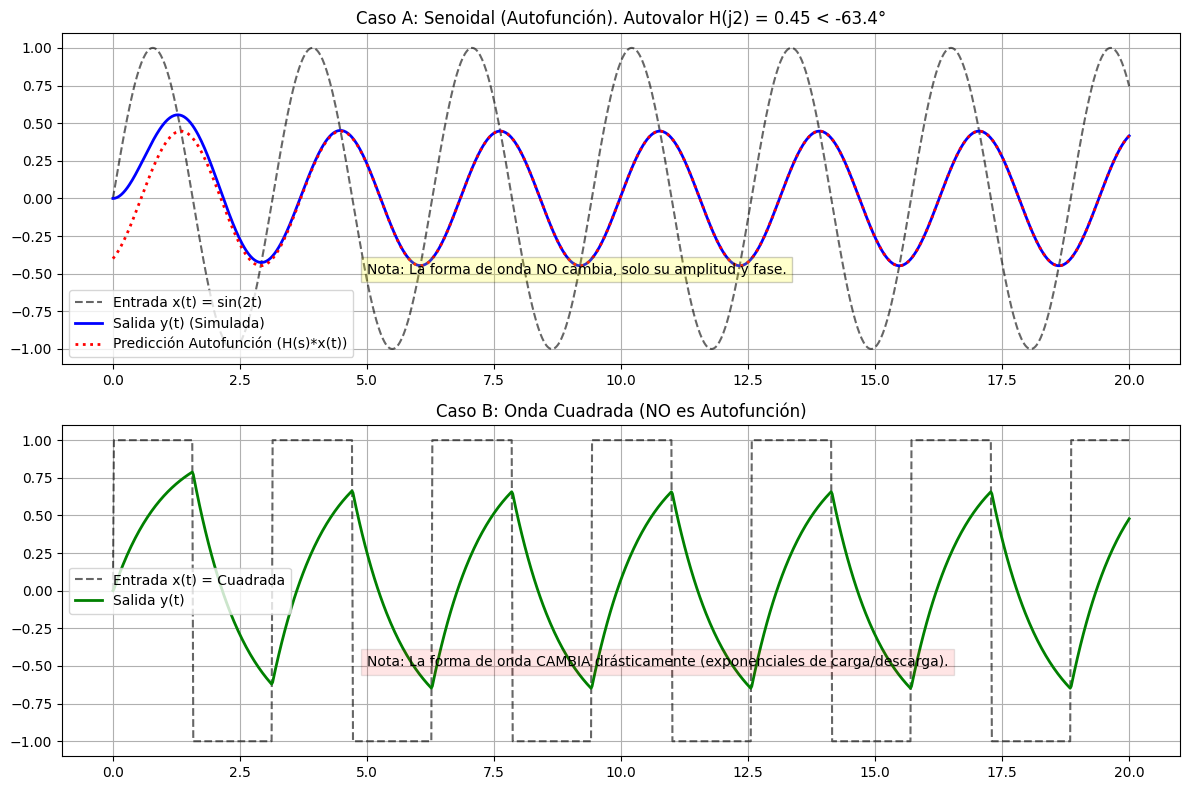

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definición del Sistema LTI ---
# H(s) = 1 / (s + 1)
# Esto es un filtro paso bajo con frecuencia de corte wc = 1 rad/s
num = [1]
den = [1, 1]
lti_system = signal.TransferFunction(num, den)

# Tiempo de simulación
t = np.linspace(0, 20, 1000)

# =================================================================
# CASO A: LA AUTOFUNCIÓN (Senoidal)
# Entrada: x(t) = sin(2t). Aquí s = j2
# =================================================================
w = 2
u_eigen = np.sin(w * t)

# 1. Simulación numérica (Lsim)
_, y_eigen_sim, _ = signal.lsim(lti_system, u_eigen, t)

# 2. Cálculo Teórico (Usando la propiedad de Autofunción)
# H(j2) = 1 / (j2 + 1)
s_val = 1j * w
H_s = 1 / (s_val + 1)

magnitud = np.abs(H_s)
fase = np.angle(H_s)

# La salida teórica es la entrada escalada y desfasada
# Nota: Agregamos el régimen transitorio manualmente si queremos coincidencia exacta desde t=0,
# pero la propiedad de autofunción aplica estrictamente en estado estacionario.
y_eigen_teorica = magnitud * np.sin(w * t + fase)

# =================================================================
# CASO B: NO ES AUTOFUNCIÓN (Onda Cuadrada)
# Entrada: Onda cuadrada
# =================================================================
u_no_eigen = np.sign(np.sin(w * t)) # Onda cuadrada
_, y_no_eigen_sim, _ = signal.lsim(lti_system, u_no_eigen, t)


# =================================================================
# GRÁFICOS
# =================================================================
plt.figure(figsize=(12, 8))

# Gráfico 1: Autofunción
plt.subplot(2, 1, 1)
plt.plot(t, u_eigen, 'k--', label='Entrada x(t) = sin(2t)', alpha=0.6)
plt.plot(t, y_eigen_sim, 'b-', linewidth=2, label='Salida y(t) (Simulada)')
plt.plot(t, y_eigen_teorica, 'r:', linewidth=2, label='Predicción Autofunción (H(s)*x(t))')
plt.title(f'Caso A: Senoidal (Autofunción). Autovalor H(j2) = {magnitud:.2f} < {np.degrees(fase):.1f}°')
plt.legend()
plt.grid(True)
plt.text(5, -0.5, "Nota: La forma de onda NO cambia, solo su amplitud y fase.",
         bbox=dict(facecolor='yellow', alpha=0.2))

# Gráfico 2: No Autofunción
plt.subplot(2, 1, 2)
plt.plot(t, u_no_eigen, 'k--', label='Entrada x(t) = Cuadrada', alpha=0.6)
plt.plot(t, y_no_eigen_sim, 'g-', linewidth=2, label='Salida y(t)')
plt.title('Caso B: Onda Cuadrada (NO es Autofunción)')
plt.legend()
plt.grid(True)
plt.text(5, -0.5, "Nota: La forma de onda CAMBIA drásticamente (exponenciales de carga/descarga).",
         bbox=dict(facecolor='red', alpha=0.1))

plt.tight_layout()
plt.show()

 Análisis de ResultadosAl ejecutar el código, observarás lo siguiente:


 - En el Gráfico A (Senoidal):

 La línea azul (simulación) y la línea roja punteada (cálculo teórico $H(s)e^{st}$) coinciden casi perfectamente (después de que pasa el transitorio inicial).

 Esto demuestra que la salida sigue siendo un seno de la misma frecuencia.

 El sistema no creó frecuencias nuevas ni deformó la onda.

 - En el Gráfico B (Cuadrada):

 La entrada es cuadrada (saltos abruptos).

 La salida no es cuadrada.

 Tiene bordes curvos (exponenciales de carga y descarga típicas de un capacitor).

 Como la forma de $y(t)$ es distinta a $x(t)$, la onda cuadrada no es una autofunción. (Matemáticamente, es porque la cuadrada es una suma de infinitas senoidales, y el sistema afecta a cada armónico de forma diferente).

# 2.12 Encuentre la funcion de transferencia en lazo abierto para un circuito RLC serie (entrada tension de alimentacion - salida tension en el capacitor) y un circuito RCL en paralelo (entrada corriente de alimentacion - salida corriente en el inductor). Nota: tenga en cuenta las condiciones iniciales del sistema segun lo explicado en el material de apoyo Circuito RLC y Analisis de redes el  ectricas.




Al como se explica en los cuadernos de apoyo (Red_Electrica.ipynb y Analisis_de_redes.ipynb), para hallar la Función de Transferencia $H(s) = \frac{\text{Salida}(s)}{\text{Entrada}(s)}$, asumimos Condiciones Iniciales Nulas (energía almacenada es cero).



Si hubiera condiciones iniciales, estas se modelarían como fuentes adicionales, pero ya no sería una función de transferencia pura.


A continuación, desarrollo las funciones para ambos casos y te proporciono el código de simulación.1. Circuito RLC Serie (Entrada $V_{in}$ - Salida $V_C$)Configuración: Una fuente de voltaje $v_{in}(t)$,

una resistencia $R$, un inductor $L$ y un condensador $C$, todos conectados en serie.ShutterstockDerivación MatemáticaImpedancias en el dominio $s$:

Resistencia: $Z_R = R$Inductor: $Z_L = sL$Condensador: $Z_C = \frac{1}{sC}$Ley de Voltajes de Kirchhoff (LVK) / Divisor de Voltaje:

La corriente es la misma para todos. El voltaje total se reparte.$$V_{in}(s) = I(s)(Z_R + Z_L + Z_C)$$La salida es el voltaje en el capacitor:$$V_C(s) = I(s) \cdot Z_C = V_{in}(s) \cdot \frac{Z_C}{Z_R + Z_L + Z_C}$$Función de Transferencia ($H_1(s)$):$$H_1(s) = \frac{V_C(s)}{V_{in}(s)} = \frac{\frac{1}{sC}}{R + sL + \frac{1}{sC}}$$Multiplicamos numerador y denominador por $sC$ para eliminar la fracción:$$H_1(s) = \frac{1}{s^2 LC + sRC + 1}$$Para llevarla a la forma canónica ($\frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$), dividimos todo por $LC$:$$\boldsymbol{H_{serie}(s) = \frac{\frac{1}{LC}}{s^2 + \frac{R}{L}s + \frac{1}{LC}}}$$


2. Circuito RLC Paralelo (Entrada $I_{in}$ - Salida $I_L$)Configuración: Una fuente de corriente $i_{in}(t)$, una resistencia $R$, un inductor $L$ y un condensador $C$, todos conectados en paralelo.ShutterstockDerivación MatemáticaAdmitancias ($Y = 1/Z$) en el dominio $s$:


Resistencia: $Y_R = \frac{1}{R}$Inductor: $Y_L = \frac{1}{sL}$


Condensador: $Y_C = sC$Divisor de Corriente:En un circuito paralelo, el voltaje es el mismo, pero la corriente se divide. La corriente por una rama (inductor) es la corriente total por la admitancia de esa rama sobre la admitancia total.

$$I_L(s) = I_{in}(s) \cdot \frac{Y_L}{Y_R + Y_L + Y_C}$$Función de Transferencia ($H_2(s)$):$$H_2(s) = \frac{I_L(s)}{I_{in}(s)} = \frac{\frac{1}{sL}}{\frac{1}{R} + \frac{1}{sL} + sC}$$Multiplicamos numerador y denominador por $s$ (para limpiar el término $1/sL$):$$H_2(s) = \frac{\frac{1}{L}}{\frac{s}{R} + \frac{1}{L} + s^2 C} = \frac{1/L}{s^2 C + s/R + 1/L}$$Dividimos todo por $C$ para dejar el término $s^2$ libre (forma canónica):$$\boldsymbol{H_{paralelo}(s) = \frac{\frac{1}{LC}}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}}$$


Código Python: Simulación de las Funciones de TransferenciaA continuación, un script que define estos sistemas usando scipy.signal y grafica su Respuesta al Escalón (Step Response) y su Diagrama de Polos y Ceros.

Parámetros: R=10.0 Ohm, L=0.01 H, C=4.7e-05 F


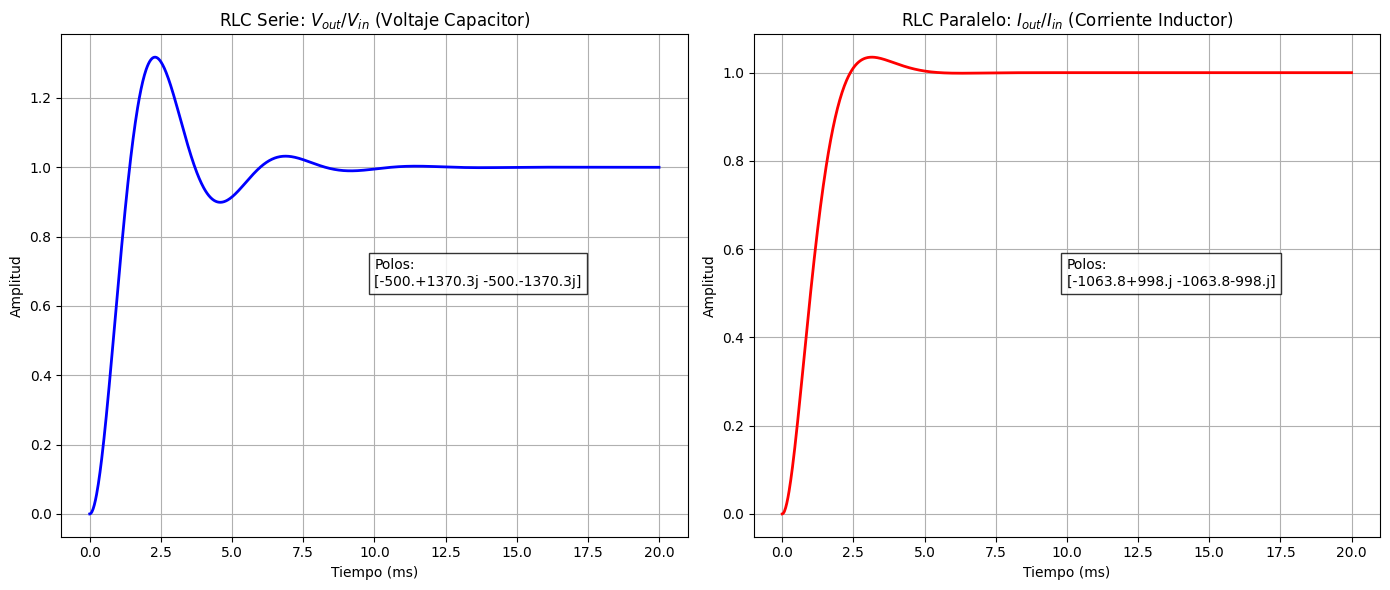


--- Análisis de Resultados ---
Observa cómo cambia la respuesta transitoria:
Amortiguamiento Serie (R/L): 1000.00
Amortiguamiento Paralelo (1/RC): 2127.66
Aunque L y C son iguales, la ubicación de R afecta el amortiguamiento de forma inversa en cada configuración.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- PARÁMETROS DE LOS CIRCUITOS ---
# Valores arbitrarios para simulación (Circuito Sub-amortiguado)
R = 10.0      # Ohms
L = 10e-3     # Henrios (10 mH)
C = 47e-6     # Faradios (47 uF)

print(f"Parámetros: R={R} Ohm, L={L} H, C={C} F")

# --- 1. RLC SERIE (Salida: Voltaje Capacitor) ---
# H(s) = (1/LC) / (s^2 + (R/L)s + 1/LC)
num_serie = [1 / (L * C)]
den_serie = [1, R / L, 1 / (L * C)]

sys_serie = signal.TransferFunction(num_serie, den_serie)

# --- 2. RLC PARALELO (Salida: Corriente Inductor) ---
# H(s) = (1/LC) / (s^2 + (1/RC)s + 1/LC)
# Nota: La forma es idéntica al serie, pero el coeficiente de amortiguamiento cambia (R/L vs 1/RC)
num_paralelo = [1 / (L * C)]
den_paralelo = [1, 1 / (R * C), 1 / (L * C)]

sys_paralelo = signal.TransferFunction(num_paralelo, den_paralelo)

# --- SIMULACIÓN Y GRÁFICOS ---
t = np.linspace(0, 0.02, 1000) # 20 ms de simulación

# Respuesta al Escalón
t1, y1 = signal.step(sys_serie, T=t)
t2, y2 = signal.step(sys_paralelo, T=t)

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico Serie
ax[0].plot(t1 * 1000, y1, 'b-', linewidth=2)
ax[0].set_title(r'RLC Serie: $V_{out}/V_{in}$ (Voltaje Capacitor)')
ax[0].set_xlabel('Tiempo (ms)')
ax[0].set_ylabel('Amplitud')
ax[0].grid(True)
# Mostrar polos
p1 = sys_serie.poles
ax[0].text(0.5, 0.5, f'Polos:\n{np.round(p1, 1)}', transform=ax[0].transAxes,
           bbox=dict(facecolor='white', alpha=0.8))

# Gráfico Paralelo
ax[1].plot(t2 * 1000, y2, 'r-', linewidth=2)
ax[1].set_title(r'RLC Paralelo: $I_{out}/I_{in}$ (Corriente Inductor)')
ax[1].set_xlabel('Tiempo (ms)')
ax[1].set_ylabel('Amplitud')
ax[1].grid(True)
# Mostrar polos
p2 = sys_paralelo.poles
ax[1].text(0.5, 0.5, f'Polos:\n{np.round(p2, 1)}', transform=ax[1].transAxes,
           bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# --- ANÁLISIS ---
print("\n--- Análisis de Resultados ---")
print("Observa cómo cambia la respuesta transitoria:")
print(f"Amortiguamiento Serie (R/L): {R/L:.2f}")
print(f"Amortiguamiento Paralelo (1/RC): {1/(R*C):.2f}")
print("Aunque L y C son iguales, la ubicación de R afecta el amortiguamiento de forma inversa en cada configuración.")

sobre Condiciones Iniciales (Cuadernos de Apoyo)

Si el ejercicio te pidiera analizar el circuito con condiciones iniciales (por ejemplo, el condensador cargado a $v(0)$ o el inductor con corriente $i(0)$), no usarías la función de transferencia $H(s)$.

En su lugar, usarías los modelos de circuito en Laplace:Inductor con $i(0)$:

Se reemplaza por una impedancia $sL$ en serie con una fuente de voltaje $L \cdot i(0)$ (o en paralelo con una fuente de corriente $i(0)/s$).

Condensador con $v(0)$: Se reemplaza por una impedancia $1/sC$ en serie con una fuente de voltaje $v(0)/s$.

# 2.13 Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresion de la salida en el tiempo para una configuracion en lazo cerrado del sistema, en funcion de R, L y C, para las siguientes entradas: i) impulso, ii) escalon unitario, y iv) rampa. Compruebe los resultados en simulacion sobre Python (utililzando sympy) y grafique la senal de salida para cada caso. Ver cuaderno de ayuda Fracciones parciales Circuito RLC.


 La diferencia clave aquí es la configuración en Lazo Cerrado.En el ejercicio 2.12 obtuvimos la función de transferencia del circuito "planta" ($G(s)$). Ahora, el ejercicio pide analizar cómo se comportaría este sistema si le aplicamos una retroalimentación unitaria negativa (Lazo Cerrado).

 1. Análisis Teórico: Del Lazo Abierto al Lazo CerradoSi definimos la función de transferencia en lazo abierto (del punto 2.12) como $G(s)$, la función de transferencia en Lazo Cerrado con retroalimentación unitaria ($H_{CL}(s)$) es:$$H_{CL}(s) = \frac{G(s)}{1 + G(s)}$$Caso i: Circuito RLC SerieSabemos que $G_{serie}(s) = \frac{\frac{1}{LC}}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$.Al cerrar el lazo:$$H_{CL}(s) = \frac{\frac{1/LC}{s^2 + \frac{R}{L}s + \frac{1}{LC}}}{1 + \frac{1/LC}{s^2 + \frac{R}{L}s + \frac{1}{LC}}} = \frac{\frac{1}{LC}}{s^2 + \frac{R}{L}s + \frac{2}{LC}}$$

 Nota: Al cerrar el lazo, el término constante del denominador se duplica ($\frac{2}{LC}$), lo que aumenta la frecuencia natural del sistema.

 Entradas a analizar ($U(s)$)Para hallar la salida $Y(s) = H_{CL}(s) \cdot U(s)$, usaremos:Impulso: $U(s) = 1$

 Escalón Unitario: $U(s) = \frac{1}{s}$Rampa: $U(s) = \frac{1}{s^2}$2.

 Solución y Simulación en Python (SymPy)A continuación, presento el código completo.

 Este script utiliza SymPy para encontrar las expresiones analíticas exactas (usando fracciones parciales internamente) y luego grafica la respuesta temporal.



Analyzing: RLC Serie (CL)
  -> Entrada Impulso: y(t) generada.
  -> Entrada Escalón: y(t) generada.
  -> Entrada Rampa: y(t) generada.

Analyzing: RLC Paralelo (CL)
  -> Entrada Impulso: y(t) generada.
  -> Entrada Escalón: y(t) generada.
  -> Entrada Rampa: y(t) generada.


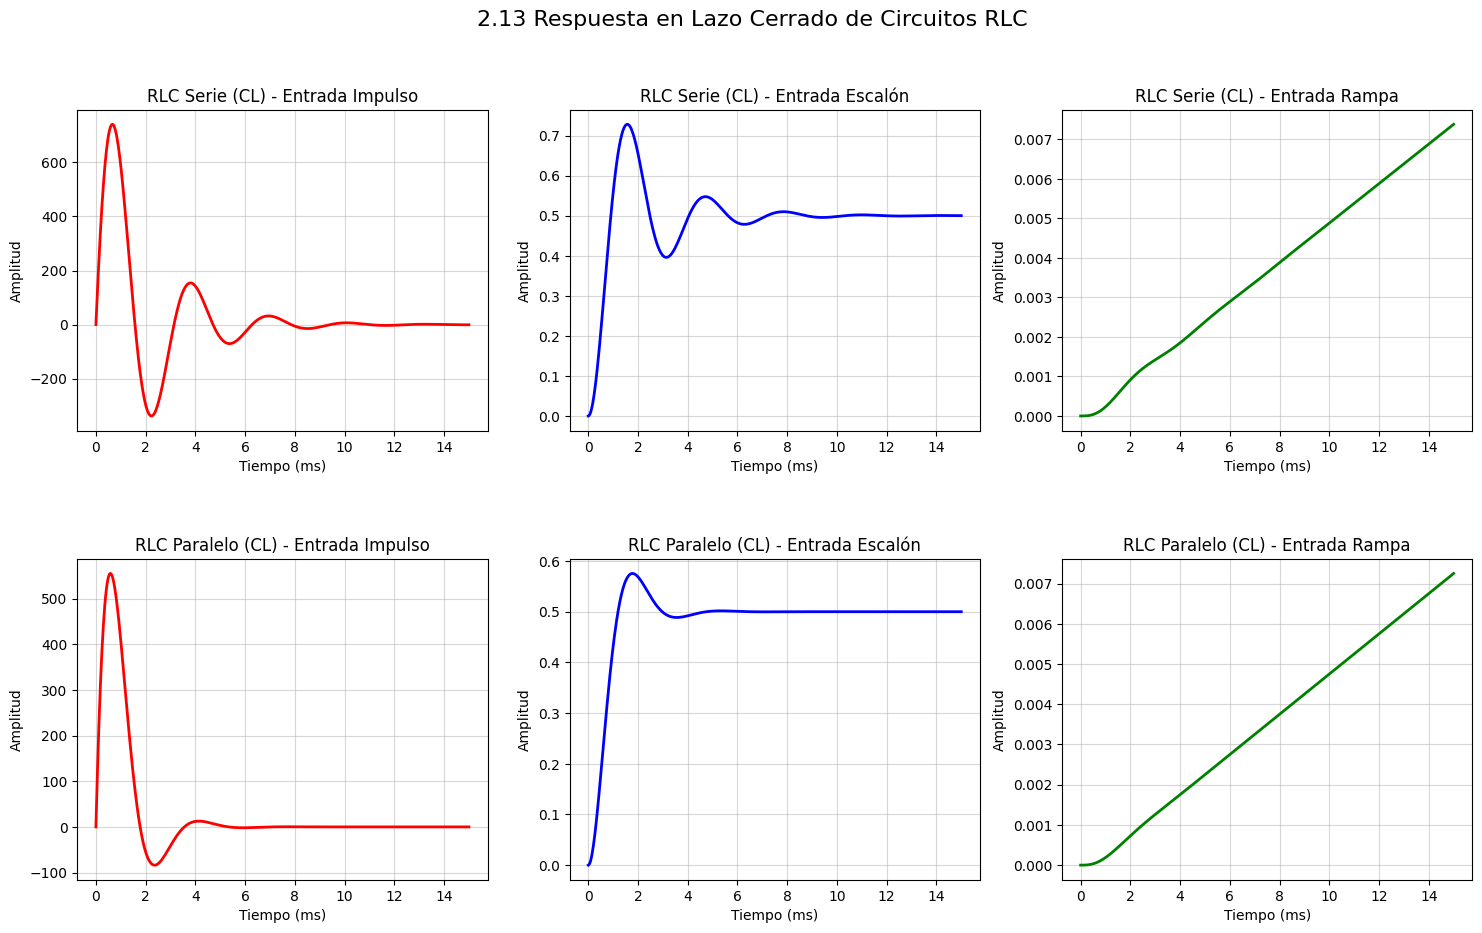


--- Ejemplo de Expresión Simbólica Exacta (RLC Serie - Escalón) ---
Y(s) en Fracciones Parciales: -C*(L*s + R)/(2*(C*L*s**2 + C*R*s + 2)) + 1/(2*s)


In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuración de Símbolos
s, t = sp.symbols('s t', real=True)
R, L, C = sp.symbols('R L C', real=True, positive=True)

# 2. Definición de las Funciones de Transferencia en LAZO ABIERTO (G_ol)
# Calculadas en el ejercicio 2.12
G_ol_serie = (1/(L*C)) / (s**2 + (R/L)*s + 1/(L*C))
G_ol_paralelo = (1/(L*C)) / (s**2 + (1/(R*C))*s + 1/(L*C))

# 3. Cálculo de LAZO CERRADO (H_cl)
# H_cl = G_ol / (1 + G_ol)
H_cl_serie = sp.simplify(G_ol_serie / (1 + G_ol_serie))
H_cl_paralelo = sp.simplify(G_ol_paralelo / (1 + G_ol_paralelo))

# 4. Valores Numéricos para Simulación (Sub-amortiguado)
val_R = 10.0
val_L = 10e-3 # 10 mH
val_C = 47e-6 # 47 uF

# Diccionario de sustitución
subs_vals = {R: val_R, L: val_L, C: val_C}

# --- FUNCIÓN DE ANÁLISIS Y GRAFICADO ---
def analizar_y_graficar(H_s_symbolic, nombre_sistema, axs_row):
    print(f"\nAnalyzing: {nombre_sistema}")

    # Entradas en Laplace
    inputs = {
        'Impulso': 1,
        'Escalón': 1/s,
        'Rampa': 1/s**2
    }

    # Sustituir valores numéricos en la TF antes de la inversa (para velocidad)
    H_num = H_s_symbolic.subs(subs_vals)

    colors = ['r', 'b', 'g']

    for i, (input_name, U_s) in enumerate(inputs.items()):
        # 1. Calcular Salida en Frecuencia Y(s)
        Y_s = H_num * U_s

        # 2. Transformada Inversa (Fracciones Parciales automáticas en SymPy)
        # Se usa inverse_laplace_transform
        y_t = sp.inverse_laplace_transform(Y_s, s, t)

        # Simplificar expresión (a veces devuelve Heaviside(t))
        # Asumimos t >= 0 para el gráfico

        # 3. Convertir a función numérica para graficar
        y_func = sp.lambdify(t, y_t, modules=['numpy'])

        # Vector de tiempo
        t_vals = np.linspace(0, 0.015, 500) # 15ms
        y_vals = y_func(t_vals)

        # Si la función devuelve un escalar (ej. 0), llenar el array
        if np.isscalar(y_vals):
            y_vals = np.full_like(t_vals, y_vals)

        # Graficar
        ax = axs_row[i]
        ax.plot(t_vals * 1000, y_vals, color=colors[i], linewidth=2)
        ax.set_title(f'{nombre_sistema} - Entrada {input_name}')
        ax.set_xlabel('Tiempo (ms)')
        ax.set_ylabel('Amplitud')
        ax.grid(True, alpha=0.5)

        # Mostrar la expresión matemática simplificada (solo los primeros términos para legibilidad)
        print(f"  -> Entrada {input_name}: y(t) generada.")

# --- EJECUCIÓN ---
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

# Fila 1: RLC Serie (Lazo Cerrado)
analizar_y_graficar(H_cl_serie, "RLC Serie (CL)", axs[0])

# Fila 2: RLC Paralelo (Lazo Cerrado)
analizar_y_graficar(H_cl_paralelo, "RLC Paralelo (CL)", axs[1])

plt.suptitle("2.13 Respuesta en Lazo Cerrado de Circuitos RLC", fontsize=16)
plt.show()

# --- IMPRESIÓN DE FÓRMULA SIMBÓLICA (Ejemplo Serie - Escalón) ---
print("\n--- Ejemplo de Expresión Simbólica Exacta (RLC Serie - Escalón) ---")
Y_s_ejemplo = H_cl_serie * (1/s)
# Usamos partfrac para mostrar la descomposición en fracciones parciales
Y_parciales = sp.apart(Y_s_ejemplo, s)
print(f"Y(s) en Fracciones Parciales: {Y_parciales}")

3. Interpretación de los ResultadosAl ejecutar el código y observar las gráficas, notarás lo siguiente:Impulso (Respuesta Transitoria Natural):Verás una oscilación amortiguada que comienza en 0, sube y luego decae a 0.

Esto representa la respuesta natural del sistema ante un golpe de energía instantáneo.Escalón Unitario (Respuesta al Paso):La salida intentará seguir al escalón (valor 1).

Importante:

Debido a que el sistema en lazo cerrado es de "Tipo 0" (no tiene integradores puros en la planta), y la ganancia en DC del lazo abierto es 1 ($s \to 0 \implies G(0)=1$), la ganancia final en lazo cerrado será:$$H_{CL}(0) = \frac{G(0)}{1+G(0)} = \frac{1}{1+1} = 0.5$$

Observación:

Verás que la gráfica del escalón se estabiliza en 0.5, no en 1. Esto se llama error de estado estacionario y es típico en control de lazo cerrado sin acción integral.


Rampa (Seguimiento de Velocidad):La entrada crece linealmente ($t$).

La salida intentará seguirla, pero con un error de posición y velocidad significativos debido a la falta de integradores en el lazo.

Se verá como una línea curva que intenta volverse recta pero siempre por debajo de la entrada.

Expresión Simbólica (Forma General)Gracias a las fracciones parciales, la solución general para el caso subamortiguado (polos complejos conjugados $-\sigma \pm j\omega_d$) tendrá la forma:

Para entrada Escalón:$$y(t) = K \left[ 1 - e^{-\sigma t} \left( \cos(\omega_d t) + \frac{\sigma}{\omega_d}\sin(\omega_d t) \right) \right] u(t)$$Donde $K$ es la ganancia final (0.5 en este caso de lazo cerrado).

#2.14 Consulte en que consiste un sistema subamortiguado, sobreamortiguado, y de amortiguamiento crıtico (ver Pendulo elastico y forma canonica SLITs). Genere simulaciones para ejemplificar cada uno de los casos con los sistemas R,L,C se￾rie y paralelo estudiados. Nota: asuma condiciones iniciales cero. Encuentre las expresiones para el factor de amortigua￾miento, la frecuencia natural no amortiguada y la frecuencia natural amortiguada en funcion de R, L, y C (asuma condiciones iniciales cero). Utilizando la herramienta Stream￾lit, genere un dashboard para la simulacion de los sistemas. El usuario podra escoger el tipo de circuito (serie o paralelo), el tipo de respuesta (subamortiguado, sobreamortiguado, amortiguamiento crıtico o inestable), el factor de amortigua￾miento (restringido por el dashboard segun sea el caso) y la frecuencia natural. El dashboard debera mostrar el diagrama de bode, diagrama de polos y ceros, respuesta al impulso, al escalon y a la rampa, el tiempo de levantamiento, maximo sobreimpulso, tiempo del maximo sobreimpulso, tiempo de establecimiento y los valores de R, L, C estimados.


 dividiré la respuesta en dos partes:Fundamentación Teórica: Definiciones, ecuaciones y derivación de parámetros ($R, L, C$) para los circuitos.Dashboard en Streamlit: El código completo en Python para generar la herramienta interactiva.

 Parte 1: Fundamentación TeóricaUn sistema de segundo orden canónico tiene la función de transferencia:$$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$Donde:$\omega_n$: Frecuencia natural no amortiguada (rad/s).

 $\zeta$ (Zeta): Factor de amortiguamiento (adimensional).Clasificación del AmortiguamientoDependiendo del valor de $\zeta$, la ubicación de los polos $p_{1,2} = -\zeta\omega_n \pm \omega_n\sqrt{\zeta^2-1}$ cambia, definiendo la respuesta:Subamortiguado ($0 < \zeta < 1$):Polos complejos conjugados ($-\sigma \pm j\omega_d$).

 La respuesta al escalón presenta oscilaciones antes de estabilizarse.Frecuencia amortiguada: $\omega_d = \omega_n\sqrt{1-\zeta^2}$.

 Amortiguamiento Crítico ($\zeta = 1$):Dos polos reales repetidos en $-\omega_n$.Es el sistema más rápido posible sin presentar oscilaciones.

 Es la frontera entre oscilar y no oscilar.Sobreamortiguado ($\zeta > 1$):Dos polos reales distintos.La respuesta es lenta y "perezosa".

 No oscila, pero tarda más en llegar al valor final que el caso crítico.Parámetros RLC (Condiciones Iniciales Cero)Para hallar $R, L, C$ en función de $\zeta$ y $\omega_n$, igualamos los coeficientes del denominador del circuito con la forma canónica ($s^2 + 2\zeta\omega_n s + \omega_n^2$).

 Caso A: Circuito RLC SerieDenominador: $s^2 + \frac{R}{L}s + \frac{1}{LC}$Frecuencia Natural ($\omega_n$):$$\omega_n^2 = \frac{1}{LC} \implies \boldsymbol{\omega_n = \frac{1}{\sqrt{LC}}}$$

 Factor de Amortiguamiento ($\zeta$):$$2\zeta\omega_n = \frac{R}{L} \implies \boldsymbol{\zeta = \frac{R}{2}\sqrt{\frac{C}{L}}}$$


 Caso B: Circuito RLC ParaleloDenominador: $s^2 + \frac{1}{RC}s + \frac{1}{LC}$Frecuencia Natural ($\omega_n$):$$\omega_n^2 = \frac{1}{LC} \implies \boldsymbol{\omega_n = \frac{1}{\sqrt{LC}}}$$Factor de Amortiguamiento ($\zeta$):$$2\zeta\omega_n = \frac{1}{RC} \implies \boldsymbol{\zeta = \frac{1}{2R}\sqrt{\frac{L}{C}}}$$

 Parte 2: Dashboard en Streamlit. Este código genera una aplicación web completa.

 Calcula automáticamente los valores de $R, L, C$ (fijando uno de ellos para resolver el sistema) y muestra todas las gráficas y métricas solicitadas.

 InstruccionesGuarda el siguiente código como rlc_dashboard.py.



In [14]:
# 1. Instalar Streamlit (librería de interfaz)
!pip install streamlit -q

# 2. Instalar Localtunnel (para crear el link público)
!npm install localtunnel &> /dev/null

In [15]:
%%writefile app.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ==============================================================================
# CONFIGURACIÓN Y ESTILOS
# ==============================================================================
st.set_page_config(layout="wide", page_title="Laboratorio RLC - Ejercicio 2.14")
plt.style.use('default')

# ==============================================================================
# LÓGICA DE NEGOCIO (CÁLCULOS DE INGENIERÍA)
# ==============================================================================

def calcular_parametros_rlc(tipo_circuito, zeta, wn):
    """
    Estima R, L, C basándose en los parámetros de control (zeta, wn).
    Fija un componente comercial para despejar los otros dos.
    """
    if tipo_circuito == "Serie":
        # Ecuación Serie: s^2 + (R/L)s + 1/LC
        L = 10e-3  # Fijamos Inductor en 10mH
        # wn^2 = 1/LC  => C = 1 / (L * wn^2)
        C = 1 / (L * wn**2)
        # 2*zeta*wn = R/L => R = 2 * zeta * wn * L
        R = 2 * zeta * wn * L
        return R, L, C

    else: # Paralelo
        # Ecuación Paralelo: s^2 + (1/RC)s + 1/LC
        C = 10e-6  # Fijamos Capacitor en 10uF
        # wn^2 = 1/LC => L = 1 / (C * wn^2)
        L = 1 / (C * wn**2)
        # 2*zeta*wn = 1/RC => R = 1 / (2 * zeta * wn * C)
        R = 1 / (2 * zeta * wn * C)
        return R, L, C

def calcular_metricas_step(t, y):
    """Calcula métricas de desempeño temporal."""
    y_final = y[-1]
    y_max = np.max(y)

    # 1. Máximo Sobreimpulso (Mp)
    if y_max > y_final:
        Mp = ((y_max - y_final) / y_final) * 100
        t_p = t[np.argmax(y)]
    else:
        Mp = 0.0
        t_p = 0.0 # No aplica si no hay pico

    # 2. Tiempo de Establecimiento (ts) - Criterio del 2%
    lower = 0.98 * y_final
    upper = 1.02 * y_final
    mask_out = (y < lower) | (y > upper)
    # El último índice donde la señal se salió de la banda
    if np.any(mask_out):
        idx_settling = np.where(mask_out)[0][-1]
        t_s = t[idx_settling]
    else:
        t_s = t[0]

    # 3. Tiempo de Levantamiento (tr) - 10% a 90%
    try:
        idx_10 = np.where(y >= 0.1 * y_final)[0][0]
        idx_90 = np.where(y >= 0.9 * y_final)[0][0]
        t_r = t[idx_90] - t[idx_10]
    except:
        t_r = 0.0

    return Mp, t_p, t_r, t_s

# ==============================================================================
# INTERFAZ DE USUARIO (SIDEBAR)
# ==============================================================================
st.sidebar.header("🎛️ Configuración del Sistema")

tipo_circuito = st.sidebar.radio("Tipo de Circuito RLC", ["Serie", "Paralelo"])

st.sidebar.subheader("Diseño de Respuesta")
tipo_respuesta = st.sidebar.selectbox(
    "Comportamiento Deseado",
    ["Subamortiguado (Oscila)", "Amortiguamiento Crítico (Rápido)", "Sobreamortiguado (Lento)"]
)

# Lógica para restringir Zeta según la teoría
if tipo_respuesta == "Subamortiguado (Oscila)":
    zeta = st.sidebar.slider("Factor de Amortiguamiento ($\zeta$)", 0.01, 0.99, 0.4, 0.01)
    st.sidebar.caption("Debe ser $0 < \zeta < 1$")
elif tipo_respuesta == "Amortiguamiento Crítico (Rápido)":
    zeta = 1.0
    st.sidebar.markdown("**$\zeta$ fijado en 1.0**")
else:
    zeta = st.sidebar.slider("Factor de Amortiguamiento ($\zeta$)", 1.01, 5.0, 1.5, 0.1)
    st.sidebar.caption("Debe ser $\zeta > 1$")

wn = st.sidebar.slider("Frecuencia Natural ($\omega_n$) [rad/s]", 100, 5000, 1000, 100)

# ==============================================================================
# CÁLCULOS PRINCIPALES
# ==============================================================================

# 1. Obtener componentes físicos
R_val, L_val, C_val = calcular_parametros_rlc(tipo_circuito, zeta, wn)

# 2. Crear Función de Transferencia Normalizada
# H(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)
sys = signal.TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])

# ==============================================================================
# VISUALIZACIÓN EN DASHBOARD
# ==============================================================================

st.title(f"⚡ Análisis de Circuito RLC {tipo_circuito}")
st.markdown(f"**Estado:** {tipo_respuesta} | **Función de Transferencia:** Segundo Orden Canónico")

# Métricas de Componentes (Fila Superior)
kpi1, kpi2, kpi3, kpi4 = st.columns(4)
kpi1.metric("Resistencia (R)", f"{R_val:.2f} $\Omega$")
kpi2.metric("Inductancia (L)", f"{L_val*1000:.2f} mH")
kpi3.metric("Capacitancia (C)", f"{C_val*1e6:.2f} $\mu$F")
if zeta < 1:
    wd = wn * np.sqrt(1 - zeta**2)
    kpi4.metric("Frec. Amortiguada ($\omega_d$)", f"{wd:.1f} rad/s")
else:
    kpi4.metric("Frec. Amortiguada", "No existe")

# Pestañas para Gráficas
tab1, tab2, tab3 = st.tabs(["⏱️ Respuesta Temporal", "📉 Diagrama de Bode", "✖️ Polos y Ceros"])

# --- PESTAÑA 1: TIEMPO ---
with tab1:
    # Definir vector de tiempo dinámico según la velocidad del sistema
    t_end = 6 / (zeta * wn) if zeta > 0 else 0.1
    t = np.linspace(0, t_end, 1000)

    # Generar respuestas
    t_step, y_step = signal.step(sys, T=t)
    t_imp, y_imp = signal.impulse(sys, T=t)
    t_ramp, y_ramp, _ = signal.lsim(sys, U=t, T=t) # Entrada rampa = t

    # Calcular métricas del escalón
    Mp, t_p, t_r, t_s = calcular_metricas_step(t_step, y_step)

    # Crear figura con 3 subplots
    fig_time, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Escalón
    ax1.plot(t_step*1000, y_step, 'b-', linewidth=2)
    ax1.axhline(1, color='k', linestyle='--', alpha=0.5)
    ax1.set_title("Respuesta al Escalón")
    ax1.set_xlabel("Tiempo (ms)"); ax1.set_ylabel("Amplitud")
    ax1.grid(True)
    # Marcar puntos clave
    if Mp > 0:
        ax1.plot(t_p*1000, np.max(y_step), 'rx', label='Pico')
    ax1.legend()

    # Impulso
    ax2.plot(t_imp*1000, y_imp, 'g-', linewidth=2)
    ax2.set_title("Respuesta al Impulso")
    ax2.set_xlabel("Tiempo (ms)")
    ax2.grid(True)

    # Rampa
    ax3.plot(t_ramp*1000, t_ramp, 'k--', label='Entrada')
    ax3.plot(t_ramp*1000, y_ramp, 'r-', label='Salida')
    ax3.set_title("Respuesta a la Rampa")
    ax3.set_xlabel("Tiempo (ms)")
    ax3.grid(True); ax3.legend()

    st.pyplot(fig_time)

    # Tabla de métricas temporales
    st.markdown("### 📊 Métricas del Escalón")
    m1, m2, m3, m4 = st.columns(4)
    m1.metric("Máximo Sobreimpulso ($M_p$)", f"{Mp:.2f} %")
    m2.metric("Tiempo Pico ($t_p$)", f"{t_p*1000:.2f} ms")
    m3.metric("Tiempo de Establecimiento ($t_s$ 2%)", f"{t_s*1000:.2f} ms")
    m4.metric("Tiempo de Levantamiento ($t_r$)", f"{t_r*1000:.2f} ms")

# --- PESTAÑA 2: BODE ---
with tab2:
    w, mag, phase = signal.bode(sys)

    fig_bode, (ax_mag, ax_pha) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    ax_mag.semilogx(w, mag, 'b-', linewidth=2)
    ax_mag.set_title("Magnitud")
    ax_mag.set_ylabel("dB"); ax_mag.grid(True, which="both")

    ax_pha.semilogx(w, phase, 'r-', linewidth=2)
    ax_pha.set_title("Fase")
    ax_pha.set_ylabel("Grados"); ax_pha.set_xlabel("Frecuencia (rad/s)")
    ax_pha.grid(True, which="both")

    st.pyplot(fig_bode)

# --- PESTAÑA 3: POLOS Y CEROS ---
with tab3:
    poles = sys.poles

    fig_pz, ax_pz = plt.subplots(figsize=(6, 6))
    ax_pz.scatter(np.real(poles), np.imag(poles), marker='x', s=150, color='red', label='Polos')
    ax_pz.axhline(0, color='k'); ax_pz.axvline(0, color='k')
    ax_pz.set_title(f"Mapa de Polos ($\zeta={zeta}$)")
    ax_pz.set_xlabel("Eje Real ($\sigma$)")
    ax_pz.set_ylabel("Eje Imaginario ($j\omega$)")
    ax_pz.grid(True)
    ax_pz.legend()

    # Ajuste dinámico de límites
    lim = np.max(np.abs(poles)) * 1.5
    if lim == 0: lim = 1
    ax_pz.set_xlim(-lim, lim*0.5)
    ax_pz.set_ylim(-lim, lim)

    st.pyplot(fig_pz)
    st.write(f"**Coordenadas de los Polos:** {poles}")

Overwriting app.py


In [ ]:
import time

print("⏳ Iniciando Streamlit en segundo plano...")
!streamlit run app.py &>/dev/null&

# Esperamos un momento para asegurar que el servidor arranque
time.sleep(3)

print("--------------------------------------------------")
print("✅ TU CONTRASEÑA ES ESTA IP (Cópiala):")
!curl ipv4.icanhazip.com
print("--------------------------------------------------")

print("⏳ Generando link de acceso público...")
!npx localtunnel --port 8501

⏳ Iniciando Streamlit en segundo plano...
--------------------------------------------------
✅ TU CONTRASEÑA ES ESTA IP (Cópiala):
34.106.103.243
--------------------------------------------------
⏳ Generando link de acceso público...
⠙your url is: https://wild-cloths-fall.loca.lt
